# SuperVised Learning Project:

# Part A

#### DOMAIN: Medical
#### CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
#### DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
#### PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

## CSV FILES GIVEN FOR PART-A:

1.Normal.csv

2.Type_H.csv

3.Type_S.csv

## QUESTIONS:

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data Understanding: 

### A : Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [64]:
df = pd.read_csv('Normal.csv')
df.head()
# df stores the "Normal.csv" dataset file.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [65]:
df1 = pd.read_csv('Type_H.csv')
df1.head()
# df1 stores the "Type_H.csv" dataset file

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [66]:
df2 = pd.read_csv('Type_S.csv')
df2.head()
# df2 stores the "Type_S.csv" dataset file.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### B : Print Shape and columns of all the 3 DataFrame:

In [67]:
#Normal.csv 
print('NORMAL.CSV ')
print('Shape of NORMAL.CSV file  ',df.shape)
print('Columns of NORMAL.CSV file:  ',df.columns)

NORMAL.CSV 
Shape of NORMAL.CSV file   (100, 7)
Columns of NORMAL.CSV file:   Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [68]:
#Type_H.csv
print('Type_H.CSV')
print('Shape of Type_H.CSV file  ',df1.shape)
print('Columns of Type_H.CSV file:  ',df1.columns)

Type_H.CSV
Shape of Type_H.CSV file   (60, 7)
Columns of Type_H.CSV file:   Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [69]:
#Type_S.csv
print('Type_S.CSV')
print('Shape of Type_S.CSV file   ',df2.shape)
print('Columns of Type_S.CSV file:  ',df2.columns)

Type_S.CSV
Shape of Type_S.CSV file    (150, 7)
Columns of Type_S.CSV file:   Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### C.Compare Column names of all the 3 DataFrames and clearly write observations:

In [70]:
print('Dataset : Normal')
print(df.columns)
print('Dataset : Type_H')
print(df1.columns)
print('Dataset : Type_S')
print(df2.columns)

Dataset : Normal
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Dataset : Type_H
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Dataset : Type_S
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


#### "=="  helps to compare the equality of column names(features). The logical outputs : True/False will be displayed.
#### True means all columns are equal; False means columns (features) are not same in all 3 dataset

In [71]:
df.columns == df1.columns #Columns of Normal dataset and Type_H dataset are compared

array([ True,  True,  True,  True,  True,  True,  True])

In [72]:
df1.columns == df2.columns #Columns of Type_H and Type_S dataset are compared

array([ True,  True,  True,  True,  True,  True,  True])

In [73]:
df2.columns == df.columns #Columns of Type_S and Normal dataset are compared

array([ True,  True,  True,  True,  True,  True,  True])

##### All the columns have same attributes.

### D. Print DataTypes of all the 3 DataFrames.

In [74]:
df.dtypes # Normal.csv dataset

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [75]:
df1.dtypes # Type_H.csv dataset

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [76]:
df2.dtypes #Type_S.csv dataset

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

### E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames.

In [77]:
df['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

#### 'Class' Category of    'df'     dataset has categorical values : Normal,  Nrmal

In [78]:
df1['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

#### 'Class' Category of  'df1' dataset has categorical values : Type_H, type_h

In [79]:
df2['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

#### 'Class' Category of 'df2' dataset has categorical values :Type_S, Tp_s

## 2. Data Preparation and Exploration:

### B. Combine all the 3 DataFrames to form a single DataFrame 

All the 3 datasets are combined to a final dataset : df3

In [80]:
df3 = df.append([df1,df2])
print('The shape of final dataset , df3: ', df3.shape)

The shape of final dataset , df3:  (310, 7)


### A.Unify all the variations in ‘Class’ feature for all the 3 DataFrames. 

In [81]:
df3['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

#### Type_S, tp_s are combined as Type_S
####  Normal, Nrmal are combined as Normal
####  Type_H , type_h are combined as Type_H

In [82]:
df3.loc[df3['Class'] == 'tp_s','Class'] = 'Type_S'
df3.loc[df3['Class'] == 'Nrmal','Class'] = 'Normal'
df3.loc[df3['Class'] == 'type_h','Class'] = 'Type_H'

In [83]:
df3['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

### C. Print 5 random samples of this DataFrame 

In [84]:
df3.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
33,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,Type_H
71,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,Type_S
76,61.734875,17.114312,46.900000,44.620563,120.920200,3.087726,Normal
119,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,Type_S
120,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,Type_S


### D. Print Feature-wise percentage of Null values:

In [85]:
df3.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

####  Missing_Value displays Feature-Wise percentage of Null values  :

In [86]:
percent_missing = df3.isnull().sum() * 100/len(df3)
missing_value = pd.DataFrame({'Column Name' : df3.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
P_incidence,P_incidence,0.0
P_tilt,P_tilt,0.0
L_angle,L_angle,0.0
S_slope,S_slope,0.0
P_radius,P_radius,0.0
S_Degree,S_Degree,0.0
Class,Class,0.0


### E. Check 5-point summary of the new DataFrame

In [87]:
df3.describe() #This five-point summary tells about the mean,standard deviation ,IQR for these attributes.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### INSIGHTS ON FIVE-POINT SUMMARY: 

#### P_incidence:
Mean and Median are almost equal.Distribution might be Normal.

Minimum value is 26 , 75% of values are below 72 and the Maximum value is 129.

#### P_tilt:
Mean and Median are almost equal.

Distribution is Normal and Negative values are present.

75% values are below 22 and Maximum value is 49.

#### L_angle:
Mean and Median are almost equal.

There may be outliers because of maximum value.
#### S_slope:
Mean and Median almost equal.

There is little deviation at the end.
#### P_radius:
No much Deviation.

There is Normal Distribution.
#### S_degree:
Mean is greater than Median.

Right skewed in the data.

There are obvious outliers.

## 3. Data Analysis:

### A. Visualize a heatmap to understand correlation between all features

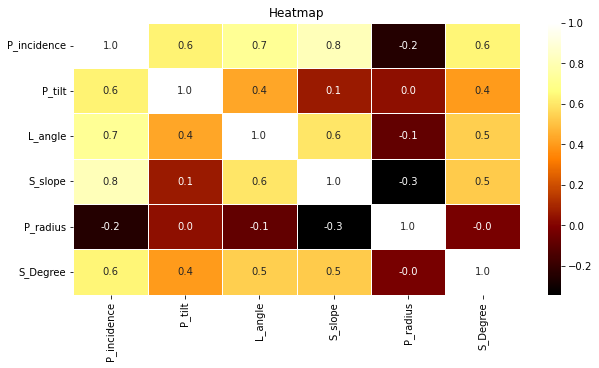

In [88]:
plt.figure(figsize=(10,5))
plt.title('Heatmap')
sns.heatmap(df3.corr(), annot=True,linewidths= '.5',fmt ='.1f',cmap = 'afmhot')# corr() is used to find the correlation between features and hence visulaised
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

Heatmap helps in better understanding of how the features are actually correlated.
Dark colours denotes negative correlation and lighter shades denotes positive correlation

### B. Share insights on correlation:

#### A. Features having stronger correlation with correlation value:

From the above heatmap, Features that are strongly correlated has correlation value closer to +1

1. S_Slope and P_incidence are highly correlated = 0.8

2. P_incidence and L_angle are highly correlated = 0.7

#### B. Features having weaker correlation with correlation value:

From the above heatmap, Features that are weakly correlated has correlation value closer to -1:

1. L_angle and P_radius are weakly correlated = -0.2

2. S_slope and P_radius are weakly correlated = -0.3


### C. Visualize a pairplot with 3 classes distinguished by colors and share insights

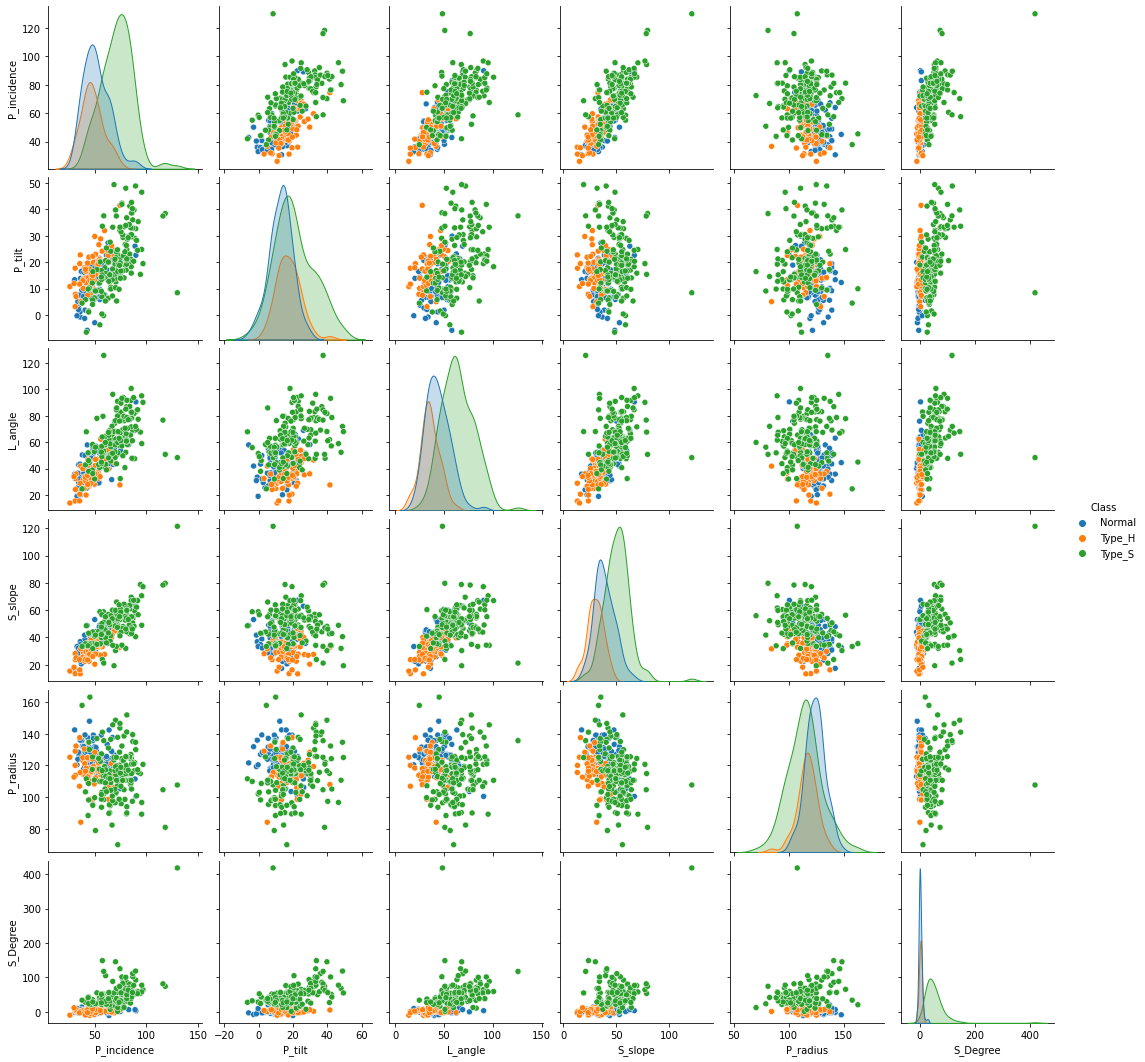

In [89]:
sns.pairplot(data = df3.reset_index(drop = True),hue = 'Class')

#### INSIGHTS:
1. P_incidence has positive relationship with all variables except P_radius.
2. L_angle has positive relationship with S_slope and S_degree.
3. P_radius has no relationship with P_Tilt.

### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

<Figure size 360x360 with 0 Axes>

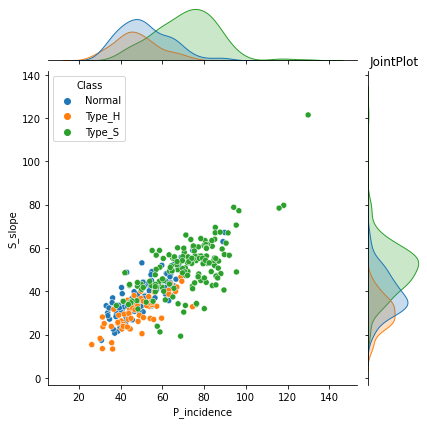

In [90]:
plt.figure(figsize=(5,5))
sns.jointplot(data = df3.reset_index(), x = 'P_incidence', y = 'S_slope',hue = 'Class')
plt.title('JointPlot')
plt.show()

#### INSIGHTS:
1. P_incidence has strongest correlation with S_slope that is.., 0.8
2. There are more number of Type_S class compared to that of Normal and Type_H.

### E. Visualize a boxplot to check distribution of the features and share insights.

In [91]:
print(df3.columns) # These are features of the final dataset

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


#### 1. S_Slope:

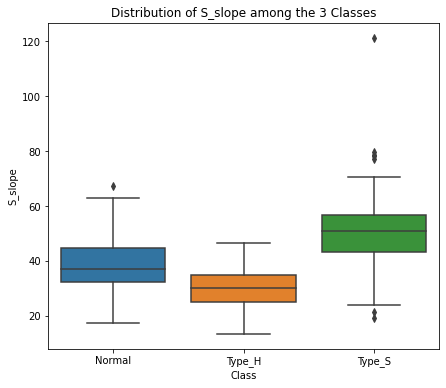

In [92]:
plt.figure(figsize=(7,6))
plt.title('Distribution of S_slope among the 3 Classes')
sns.boxplot(data= df3,x = 'Class', y= 'S_slope')
plt.show()

#### INSIGHTS:
1. S_slope has huge values for Type_S class.
2. Normal class has high S_slope compared to Type_H.

#### 2. P_incidence:

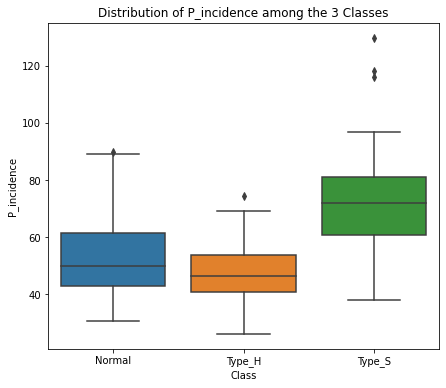

In [93]:
plt.figure(figsize=(7,6))
plt.title('Distribution of P_incidence among the 3 Classes')
sns.boxplot(data = df3,x='Class',y='P_incidence')
plt.show()

#### INSIGHTS:
1. P_incidence is larger for Type_S
2. Normal is greater than Type_H 

#### 3.P_tilt:

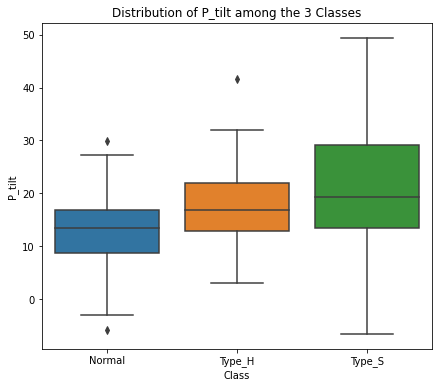

In [94]:
plt.figure(figsize=(7,6))
plt.title('Distribution of P_tilt among the 3 Classes')
sns.boxplot(data=df3,x='Class',y='P_tilt')
plt.show()

#### INSIGHTS:
1. Median of Type_S is the largest.
2. Type_H median is higher than Normal.

#### 4. L_angle:

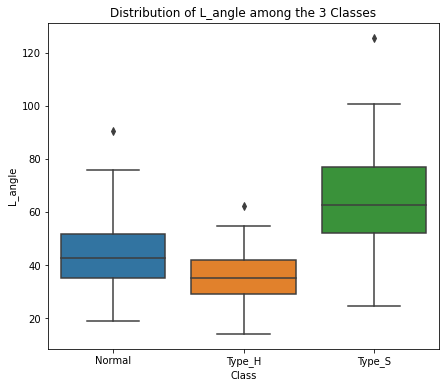

In [95]:
plt.figure(figsize=(7,6))
plt.title('Distribution of L_angle among the 3 Classes')
sns.boxplot(data=df3,x='Class',y='L_angle')
plt.show()

#### INSIGHTS:
1. Type_S has highest median value.
2. Normal has higher median than Type_H.

#### 5.P_radius:

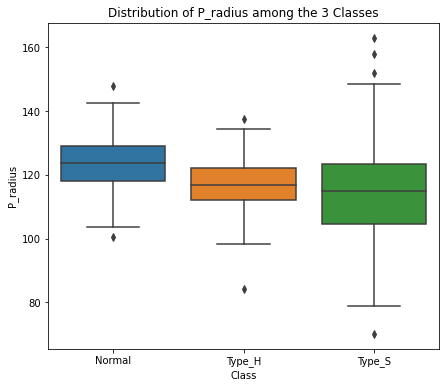

In [96]:
plt.figure(figsize=(7,6))
plt.title('Distribution of P_radius among the 3 Classes')
sns.boxplot(data=df3,x='Class',y='P_radius')
plt.show()

#### INSIGHTS:
1. Normal has highest P_radius median.
2. Type_H has higher median than Type_S.

#### 6.S_Degree:

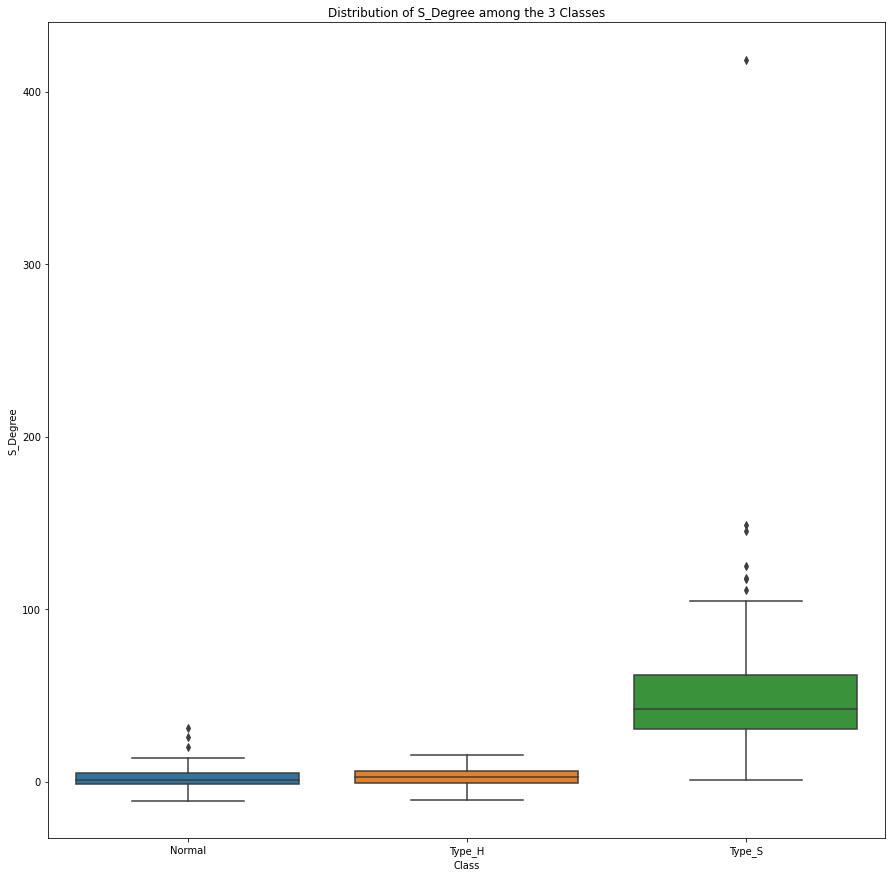

In [97]:
plt.figure(figsize=(15,15))
plt.title('Distribution of S_Degree among the 3 Classes')
sns.boxplot(data=df3,x='Class',y='S_Degree')
plt.show()

#### INSIGHTS:
1. Type_S has highest S_Degree median.
2. Normal has higher S_Degree median than Type_H

## Data Cleansing:

In [98]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [99]:
df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [101]:
col = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

#### Imputing outliers with mean values:

In [102]:
for c in col:
    q25,q75 = np.percentile(df3[c],25),np.percentile(df3[c],75)
    IQR = q75-q25
    Threshold = IQR*1.5
    lower,upper = q25-Threshold,q75+Threshold
    Outliers = [i for i in df3[c] if i < lower or i > upper]
    print('{} Total No. of Outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean without considering outliers
    df_include = df3.loc[(df3[c] >= lower) & (df3[c] <= upper)]
    mean = int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df3[c] = np.where(df3[c]>upper,mean,df3[c])
    df3[c] = np.where(df3[c]<lower,mean,df3[c])
    Outliers = [i for i in df3[c] if i < lower or i > upper]
    print('{} Total No. of Outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')

 Total No. of Outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total No. of Outliers in P_incidence After Imputing : 0


 Total No. of Outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total No. of Outliers in P_tilt After Imputing : 0


 Total No. of Outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total No. of Outliers in L_angle After Imputing : 0


 Total No. of Outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total No. of Outliers in S_slope After Imputing : 0


 Total No. of Outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total No. of Outliers in P_radius After Imputing : 0


 Total No. of Outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total No. of Outliers in S_Degree After Imputing : 0




## 4. Model Building: 

### A. Split data into X and Y.

In [103]:
X = df3.drop(columns='Class')
#X is an indeoendent variable.
y = df3['Class']
# is the target variable.

In [104]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.893743,16.548519,51.689825,42.697607,118.061242,22.193516
std,16.139975,8.404101,18.071145,12.656481,11.342178,25.230932
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705426,37.000000,33.347122,111.295804,1.603727
50%,58.691038,16.000000,49.562398,42.349084,118.000000,11.767934
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


#### Scaling Independent variables to Z-score:
#### Mean becomes 0 and standard deviation is 1

In [105]:
X_Scaled = X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-6.159947e-17,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,5.241663e-17,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,1.876635e-16,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-2.438909e-16,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-8.022257e-16,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,-1.130816e-16,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


### B. Split data into train and test with 80:20 proportion.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=10)
#test_size is given as 0.2 so that 80% data is used for training and 20% data is used for testing.

### C. Train a Supervised Learning Classification base model using KNN classifier: 

#### KneighborsClassifier is used for building the Supervised Learning Classification Base model.
#### KNeighborsClassifier implements learning based on number of neighbors based on fixed 'r' radius and 'r' is a floating point.

In [107]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#### The various parameters in KNeighboursClassifier has n_neighbors, metric, algorithm, leaf, weights,p
1. No. of Neighbors for each query point are 5
2. Here, The metric is "euclidean".
3. The default weights is 'uniform' - All points are weighted equally.

In [108]:
KNN.fit(X_train,y_train)
# Fitting the KNN model on training data : X,y
pred_labels = KNN.predict(X_test)
#Using the X_test values as input ,labels are predicted and stored in pred_labels

### D. Print all the possible performance metrics for both train and test data

The performance metrics are :
1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

##### 1.ACCURACY:

In [109]:
print('Accuracy on Training Data',KNN.score(X_train,y_train))
print('\n')
print('Accuracy on Testing Data',KNN.score(X_test,y_test))

#Accuracy on Traning Data is 0.91 but on Testing Data is 0.70

Accuracy on Training Data 0.9153225806451613


Accuracy on Testing Data 0.7096774193548387


#### Accuracy on Traning Data is 0.91 but on Testing Data is 0.70
Performance is less on Training Data .
This is due to overfitting of Data

##### 2.CONFUSION MATRIX:

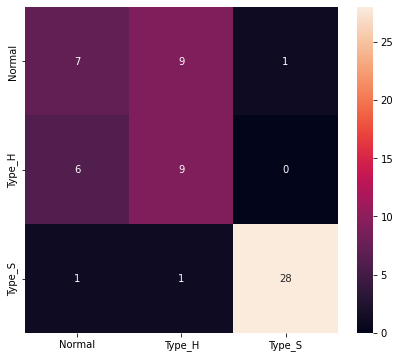

In [110]:
cm = confusion_matrix(y_test,pred_labels)
df_cm = pd.DataFrame(cm,index = [i for i in ['Normal','Type_H','Type_S']],columns = [i for i in ['Normal','Type_H','Type_S']])
plt.figure(figsize=(7,6))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

Our Models predicts Type_S correctly most of the time. Only two misclassification on this class.

##### 3.Classification Report:

In [111]:
print('Classification Matrix:\n',classification_report(y_test,pred_labels))

Classification Matrix:
               precision    recall  f1-score   support

      Normal       0.50      0.41      0.45        17
      Type_H       0.47      0.60      0.53        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.71        62
   macro avg       0.65      0.65      0.64        62
weighted avg       0.72      0.71      0.71        62



1. Precision : Out of all predicted values, what fraction are predicted correctly. +1 denotes high Precision.
##### Here, only 50% of the 'Normal' class is predicted correctly.
##### Here, only 47% of the 'Type_H' class is predicted correctly.
##### Here, only 97% of the 'Type_S' class is predicted correctly.

2. Recall : Number of correctly predicted positives to that of the total number of positives.
##### Here, only 41% of the 'Normal' class is predicted correctly.
##### Here, only 60% of the 'Type_H' class is predicted correctly.
##### Here, only 93% of the 'Type_S' class is predicted correctly.

3. F1_Score is a harmonic mean of Precision and Recall.
##### Here, only 45% of the 'Normal' class is predicted correctly.
##### Here, only 53% of the 'Type_H' class is predicted correctly.
##### Here, only 95% of the 'Type_S' class is predicted correctly.


#### These are the possible performance metrics on data.

## 5.Performance Improvement: 

### A. Experiment with various parameters to improve performance of the base model:

In [112]:
YNN = KNeighborsClassifier(n_neighbors = 5,metric = 'manhattan')
YNN.fit(X_train, y_train)
predicted_labels = YNN.predict(X_test)

In [113]:
print('Accuracy on Training data:',YNN.score(X_train, y_train))
print('Accuracy on Test data:',YNN.score(X_test, y_test))

Accuracy on Training data: 0.8991935483870968
Accuracy on Test data: 0.7258064516129032


#### Here the parameters are n_neighbours = 5, and metric used here is manhattan and also weights is 'uniform'.

In [114]:
BNN = KNeighborsClassifier(n_neighbors = 5,metric = 'hamming')
BNN.fit(X_train, y_train)
predicted_labels = BNN.predict(X_test)

In [115]:
print('Accuracy on Training data:',BNN.score(X_train, y_train))
print('Accuracy on Test data:',BNN.score(X_test, y_test))

Accuracy on Training data: 0.3588709677419355
Accuracy on Test data: 0.2903225806451613


#### Here the parameters are n_neighbours = 5, and metric used here is hamming and also weights is 'uniform'.

#### Here , the n_neighbors is 5 and weights is uniform .These parameters are kept as constant.
1. When the metric is 'Manhattan', 
Accuracy on training data is : 0.89 
Accuracy on testing data is : 0.72
1. When the metric is 'Hamming', 
Accuracy on training data is : 0.35 
Accuracy on testing data is : 0.29

In [116]:
TNN = KNeighborsClassifier(n_neighbors = 5,metric = 'manhattan',weights='distance')
TNN.fit(X_train, y_train)
predicted_labels = TNN.predict(X_test)

In [117]:
print('Accuracy on Training data:',TNN.score(X_train, y_train))
print('Accuracy on Test data:',TNN.score(X_test, y_test))

Accuracy on Training data: 1.0
Accuracy on Test data: 0.7258064516129032


#### Here the parameters are n_neighbours = 5, and metric used here is manhattan and also weights is 'distance'.

In [118]:
LNN = KNeighborsClassifier(n_neighbors = 5,metric = 'hamming',weights='distance')
LNN.fit(X_train, y_train)
predicted_labels = LNN.predict(X_test)

In [119]:
print('Accuracy on Training data:',LNN.score(X_train, y_train))
print('Accuracy on Test data:',LNN.score(X_test, y_test))

Accuracy on Training data: 1.0
Accuracy on Test data: 0.2903225806451613


#### Here the parameters are n_neighbours = 5, and metric used here is hamming and also weights is 'distance'.

#### Here , the n_neighbors is 5 and weights is distance
1. When the metric is 'Manhattan', 
Accuracy on training data is : 1
Accuracy on testing data is : 0.72
1. When the metric is 'Hamming', 
Accuracy on training data is : 1 
Accuracy on testing data is : 0.29

### B. Clearly showcase improvement in performance achieved:

In [120]:
#For the range of values of 1 to 51 of k, KNN model is fit on training data :X,y
train_score = []
test_score = []
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    KNN.fit(X_train,y_train)
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

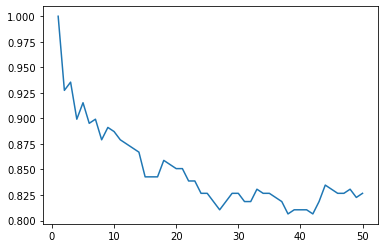

In [121]:
#Train Accuracy score is calculated for range of values of 1 to 51
plt.plot(range(1,51),train_score)
plt.show()

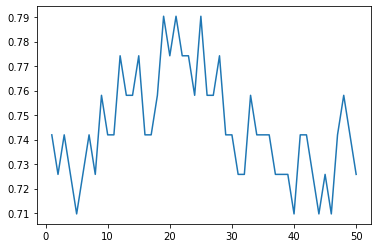

In [122]:
#Test Accuracy score is calculated for range of values of 1 to 51
plt.plot(range(1,51),test_score)
plt.show()

1. Maximum Accuracy is high, when k is less than 30.
2. We will have to fix k for less than 30

In [123]:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    KNN.fit(X_train,y_train)
    pred_labels = KNN.predict(X_test)
    print('Accuracy on Training Data for k {} is {}:'.format(i,KNN.score(X_train,y_train)))
    print('Accuracy on Testing Data for k {} is {}:'.format(i,KNN.score(X_test,y_test)))
    print('Classification matirix:\n',classification_report(y_test,pred_labels))

Accuracy on Training Data for k 1 is 1.0:
Accuracy on Testing Data for k 1 is 0.7419354838709677:
Classification matirix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

Accuracy on Training Data for k 3 is 0.9354838709677419:
Accuracy on Testing Data for k 3 is 0.7419354838709677:
Classification matirix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.7

### For this , to be achieved: 
1. Accuracy: +15% improvement
2. Precision: +10% improvement

The Classification report is generated for range of values of 1 to 51.
#### When n_neighbors was 5 : 
Train Acc = 0.91
Test Acc = 0.70
#### When n_neighbors was 25:
Train Acc = 0.82
Test Acc = 0.79
### Here when k is chosen as 25 then Accuracy and Precision are improved as mentioned above

### C. Clearly state which parameters contributed most to improve model performance. 

In [124]:
KNN = KNeighborsClassifier(n_neighbors = 25, metric = 'euclidean')

In [125]:
KNN.fit(X_train,y_train)
pred_labels = KNN.predict(X_test)

In [126]:
print('Accuracy on Training Data',KNN.score(X_train,y_train))
print('\n')
print('Accuracy on Testing Data',KNN.score(X_test,y_test))

Accuracy on Training Data 0.8266129032258065


Accuracy on Testing Data 0.7903225806451613


In [127]:
print('Classification Matrix:\n',classification_report(y_test,pred_labels))

Classification Matrix:
               precision    recall  f1-score   support

      Normal       0.60      0.71      0.65        17
      Type_H       0.67      0.67      0.67        15
      Type_S       1.00      0.90      0.95        30

    accuracy                           0.79        62
   macro avg       0.76      0.76      0.75        62
weighted avg       0.81      0.79      0.80        62



### The parameters that contributed the most to improve model performance:
1. n_neighbors is 25 , metric used here is for 'euclidean'
2. We have balanced train and test error

# PART B

#### DOMAIN: Banking, Marketing
#### CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. 

#### DATA DICTIONARY:
1. Team: Team’s name
2. ID: Customer ID
3. Age: Customer’s approximate age.
4. CustomerSince: Customer of the bank since. [unit is masked]
5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6. ZipCode: Customer’s zip code.
7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9. Level: A level associated to the customer which is masked by the bank as an IP.
10. Mortgage: Customer’s mortgage. [unit is masked]
11. Security: Customer’s security asset with the bank. [unit is masked]
12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
13. InternetBanking: if the customer uses internet banking.
14. CreditCard: if the customer uses bank’s credit card.
15. LoanOnCard: if the customer has a loan on credit card.

#### PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

## CSV FILES GIVEN FOR PART-B:
1. Data1.csv
2. Data2.csv

## QUESTIONS:

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding and Preparation:

### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [2]:
df4 = pd.read_csv('Data1.csv')
df4.head() #Data1 is stored in df4 variable.

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [3]:
df5 = pd.read_csv('Data2.csv') 
df5.head()#Data2 is stored in df5 variable.

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


### B. Print shape and Column Names and DataTypes of both the Dataframes:

In [4]:
print('Shape of Data1 csv file :',df4.shape)
# df4 has 5000 rows with 8 columns

Shape of Data1 csv file : (5000, 8)


In [5]:
print('Shape of Data2 csv file:',df5.shape)
# df5 has 5000 rows with 7 columns

Shape of Data2 csv file: (5000, 7)


In [6]:
#Datatypes of df4 Dataframe 
df4.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [7]:
#Datatypes of df5 Dataframe
df5.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [8]:
print('Columns of Data1 csv file:',df4.columns)

Columns of Data1 csv file: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')


In [9]:
print('Columns of Data2 csv file:',df5.columns)

Columns of Data2 csv file: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame:

In [10]:
df6 = df4.merge(df5,left_on = 'ID',right_on = 'ID')

##### Datasets : Data1,Data2 csv files are merged based on same 'ID' present and the final dataset is ready and stored on df6 variable.

In [11]:
print('Shape of Final Dataset is :',df6.shape)

Shape of Final Dataset is : (5000, 14)


In [12]:
df6.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [13]:
df6.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

### D. Change Datatype of below features to ‘Object’:
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore'

In [14]:
col = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore','LoanOnCard']
for i in col:
       df6[i] = df6[i].astype('category')

#### Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.

In [15]:
df6.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

## 2. Data Exploration and Analysis:

### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

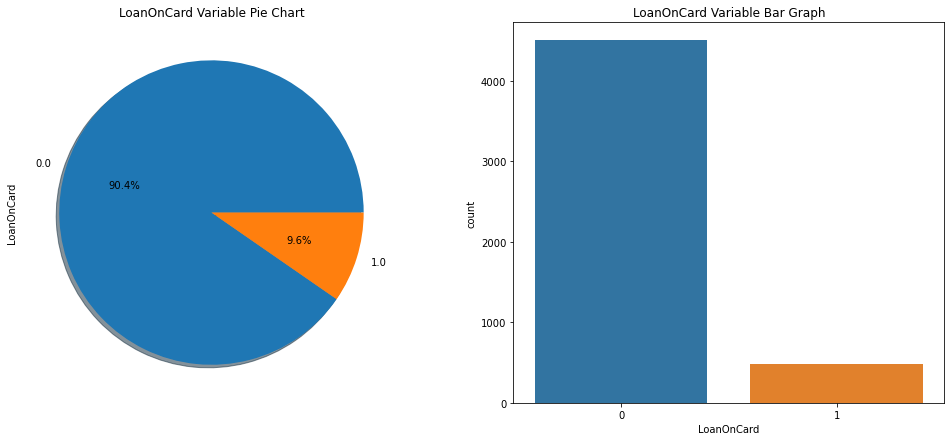

In [16]:
f,axes = plt.subplots(1,2,figsize = (17,7))
df6['LoanOnCard'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axes[0],shadow = True)
sns.countplot('LoanOnCard',data = df6,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

#### INSIGHTS:
1. There is a huge imbalance in target variable.
2. If the imbalance data is not treated beforehand, then this will degrade the performance of the classifier model.
3. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them.
4. This will result in a high bias in the model.

### B. Check the percentage of missing values and impute if required. 

In [17]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [18]:
#df6 Final Dataset has columns of 6 category type, 6 int type, 2 float type
# df6 stores memory of 381.7 KB 

In [19]:
df6.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [20]:
percent_missing = df6.isnull().sum() * 100/len(df6)
missing_value = pd.DataFrame({'Column Name' : df6.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
ID,ID,0.0
Age,Age,0.0
CustomerSince,CustomerSince,0.0
HighestSpend,HighestSpend,0.0
ZipCode,ZipCode,0.0
HiddenScore,HiddenScore,0.0
MonthlyAverageSpend,MonthlyAverageSpend,0.0
Level,Level,0.0
Mortgage,Mortgage,0.0
Security,Security,0.0


Percentage of missing values in 'LoanOnCard' is 0.4 
#### Since we have very few missing values on Target Variable : 'LoanOnCard', we will drop them.

In [21]:
df6.dropna(axis = 0,inplace = True)
df6.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [22]:
percent_missing = df6.isnull().sum() * 100/len(df6)
missing_value = pd.DataFrame({'Column Name' : df6.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
ID,ID,0.0
Age,Age,0.0
CustomerSince,CustomerSince,0.0
HighestSpend,HighestSpend,0.0
ZipCode,ZipCode,0.0
HiddenScore,HiddenScore,0.0
MonthlyAverageSpend,MonthlyAverageSpend,0.0
Level,Level,0.0
Mortgage,Mortgage,0.0
Security,Security,0.0


On dropping all the 'nan' values, now there are no missing values.

### C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [23]:
df6.describe(include='all') # Checking for nan values in categorical variables

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.0,4980.000000,4980.0,4980.000000,4980.0,4980.0,4980.0,4980.0,4980.0
unique,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,1466.0,NaN,2089.0,NaN,4460.0,4678.0,2974.0,3514.0,4500.0
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,NaN,1.939536,NaN,56.589759,NaN,NaN,NaN,NaN,NaN
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,NaN,1.750006,NaN,101.836758,NaN,NaN,NaN,NaN,NaN
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,NaN,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,NaN,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,NaN,2.525000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN


There are 'nan' values in the categorical variables : 'HiddenScore','Level', 'Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard'

#### Since columns like : 'ID','Age','CustomerSince','Zipcode','CreditCard','InternetBanking','Security' do not have any effect on Target Variable.

In [24]:
df6.drop('ID',axis=1,inplace=True)
df6.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)
df6.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

In [25]:
df6.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
9,180,1,8.9,3,0,0,1.0
10,105,4,2.4,3,0,0,0.0
11,45,3,0.1,2,0,0,0.0
12,114,2,3.8,3,0,0,0.0
13,40,4,2.5,2,0,0,0.0


There are no unexpected values in any of the attributes.

#### Imputing outliers with mean value:

In [26]:
col = ['HighestSpend','MonthlyAverageSpend','Mortgage']

In [27]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df6[c],25),np.percentile(df6[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df6[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df6.loc[(df6[c] >= lower) & (df6[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df6[c]=np.where(df6[c]>upper,mean,df6[c])
    df6[c]=np.where(df6[c]<lower,mean,df6[c])
    Outliers=[i for i in df6[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




## 3. Data Preparation and model building: 

### A. Split data into X and Y:
Recommended to drop ID & ZipCode. LoanOnCard is target Variable

1. Already 'ID' Column is dropped ,Now 'ZipCode' Column will be dropped.
2. Also, since 'LoanOnCard' is the target that will also be dropped from X and stored in y.

In [28]:
X = df6.drop(columns = 'LoanOnCard') # X contains all the independent attributes(Predictors)
y = df6['LoanOnCard'] # y is the target variable

### B. Split data into train and test. Keep 25% data reserved for testing:

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

Since, its mentioned that data for testing must be 25% : its given as test_size = 0.25

### C. Train a Supervised Learning Classification base model - Logistic Regression:

1. Here,Logistic Regression model is fit on the training data.
2. Then,X_test values are used to predict the outputs and stored in pred.
3. Pred and y_test values are compared , its accuracy is found.

In [30]:
logit = LogisticRegression()
logit.fit(X_train,y_train)
logit_pred = logit.predict(X_test)
print('Accuracy on Training Data:',logit.score(X_train,y_train))#Training data accuracy
print('Accuracy on Testing Data:',logit.score(X_test,y_test))#Testing Data Accuracy

Accuracy on Training Data: 0.9502008032128514
Accuracy on Testing Data: 0.940562248995984


#### INSIGHTS:
95% accuracy on Training Data,94% accuracy on Testing Data.

Here, Training and Training accuracy are balanced when model is built without sampling.

### D. Print evaluation metrics for the model and clearly share insights.

The performance metrics are :
1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

Accuracy is already found.

##### Now its Confusion Matrix:

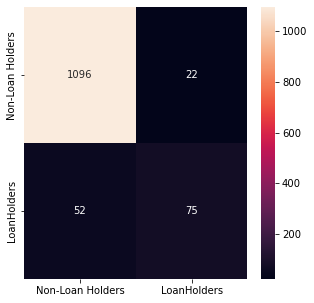

In [31]:
cm = confusion_matrix(y_test,logit_pred,labels = [0,1])
df_cm = pd.DataFrame(cm,index = [i for i in ['Non-Loan Holders','LoanHolders']],
                     columns = [i for i in ['Non-Loan Holders','LoanHolders']])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm,annot = True,fmt = 'g')
plt.show()

Mostly , The model predicts the datas too be "Non-Loan Holders"

##### Classification Report:

In [32]:
print('Classification Matrix:\n',classification_report(y_test,logit_pred))

Classification Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1118
         1.0       0.77      0.59      0.67       127

    accuracy                           0.94      1245
   macro avg       0.86      0.79      0.82      1245
weighted avg       0.94      0.94      0.94      1245



Though accuracy is good, model is poor in predicting Class 1(Loan-Holders).

This can be found by seeing Recall Value.

### E. Balance the data using the right balancing technique. 
i. Check distribution of the target variable

ii. Say output is class A : 20% and class B : 80%

iii. Here you need to balance the target variable as 50:50.

iv. Try appropriate method to achieve the same.


#### Distribution of the Target Variable is seen below:

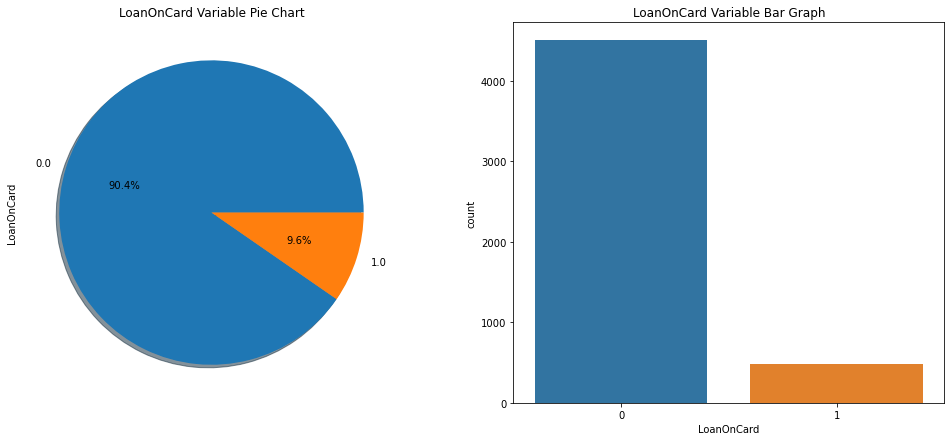

In [33]:
f,axes = plt.subplots(1,2,figsize = (17,7))
df6['LoanOnCard'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axes[0],shadow = True)
sns.countplot('LoanOnCard',data = df6,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

Output :

Class 0 : Non-Loan Holders = 90%

Class 1 : Loan - Holders = 10%

##### Here you need to balance the target variable.
We dont have enough of the samples of Class 1, so we will do sampling and check how does that work
#### SMOTE :  Synthetic Minority Over-sampling Technique done on Entire Dataset:
Here we are doing smote for all the data

In [34]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [36]:
smote_nc = SMOTENC(categorical_features = [1,3,5],random_state = 42)
x_s,y_s = smote_nc.fit_resample(X,y)

In [37]:
print('Before Sampling:')
print(y.value_counts())

Before Sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [38]:
print('After Sampling:')
print(y_s.value_counts())

After Sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


Using SMOTENC, Target variable is balanced .

Now there are 4500 datas for each class 0 and class 1.

### F. Again train the same previous model on balanced data

After balancing the target variable, data is again trained on model with test_size = 0.25

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x_s,y_s,test_size = 0.25,random_state = 10)

### G. Print evaluation metrics and clearly share differences observed. 

The performance metrics are :
1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

##### 1.Accuracy:

In [40]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train))
print('Accuracy on Test data:',logit.score(X_test, y_test))

Accuracy on Training data: 0.8755555555555555
Accuracy on Test data: 0.8844444444444445


Here, Accuracy on Training and Testing data are reduced.

#### Confusion matrix:

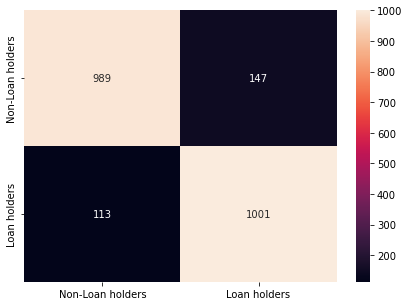

In [41]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

#### Classification Matrix:

In [42]:
print('Classification Matrix:\n',classification_report(y_test,logit_pred))

Classification Matrix:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1136
         1.0       0.87      0.90      0.89      1114

    accuracy                           0.88      2250
   macro avg       0.88      0.88      0.88      2250
weighted avg       0.88      0.88      0.88      2250



We can see that , recall value has improved after sampling of data.

Model is pretty good at categorizing the test data to be either Class 0 or 1.

##### Before Sampling:
1. Precision Value = 0.95(Class 0), 0.77(Class 1)
2. Recall value = 0.98(Class 0), 0.58(Class 1)

##### After Sampling:
1. Precision Value = 0.90(Class 0), 0.87(Class 1)
2. Recall value = 0.87(Class 0), 0.90(Class 1)

## 4. Performance Improvement: 

## A. Train a base model each for SVM, KNN

In [43]:
df6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HighestSpend,4980.0,71.468474,42.834544,8.0,39.0,64.0,93.0,185.0
MonthlyAverageSpend,4980.0,1.559255,1.160226,0.0,0.7,1.3,2.2,5.2
Mortgage,4980.0,38.027510,66.111473,0.0,0.0,0.0,38.0,252.0


In [44]:
df6.groupby(['LoanOnCard']).count()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
LoanOnCard,,,,,,
0.0,4500,4500,4500,4500,4500,4500
1.0,480,480,480,480,480,480


## Base Model for KNN:

### Split the data :

In [176]:
X = df6.drop(labels= "LoanOnCard" , axis = 1) #Independent Variables
y = df6["LoanOnCard"] #Target Variable
X.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
9,180,1,1.0,3,0,0
10,105,4,2.4,3,0,0
11,45,3,0.1,2,0,0
12,114,2,3.8,3,0,0
13,40,4,2.5,2,0,0


In [177]:
# Splitting the data for Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### KNN Model fitting on data

#### KneighborsClassifier is used for building the Supervised Learning Classification Base model.
#### KNeighborsClassifier implements learning based on number of neighbors based on fixed 'r' radius and 'r' is a floating point

In [178]:
NNH = KNeighborsClassifier(n_neighbors= 5 ,metric='euclidean')
# No of neighbors for each query are 5 and then metric used here is euclidean and weights is uniform

In [179]:
NNH.fit(X_train, y_train) #Model is fit on Training Data

KNeighborsClassifier(metric='euclidean')

In [180]:
predicted_labels = NNH.predict(X_test)
# Outputs are predicted as per test data

In [181]:
print('Accuracy on Training data:',NNH.score(X_train, y_train))
print('Accuracy on Test data:',NNH.score(X_test, y_test))

Accuracy on Training data: 0.9558232931726908
Accuracy on Test data: 0.9261044176706827


## Base Model for SVM

### Split the data

In [ ]:
X = df6.drop(labels= "LoanOnCard" , axis = 1)
y = df6["LoanOnCard"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

### SVM Model fitting on data

In [50]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model = SVC(C=0.1, kernel='rbf', gamma=1) # Parameters are set

svc_model.fit(X_train, y_train)
# Model is fir on the Trainign Data
prediction = svc_model.predict(X_test)
#labels are predicted based on X_test values

In [51]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9054886211512717
0.8979919678714859


## 4.B Tune parameters for each model, wherever required and finalize a model

### KNN

#### The various parameters in KNeighboursClassifier has n_neighbors, metric, algorithm, leaf, weights,p
1. No. of Neighbors for each query point are 5
2. Here, The metric is "euclidean".
3. The default weights is 'uniform' - All points are weighted equally.

### Optimal value of No. of Neighbors are found so that we can finaise the best model:

In [182]:
myList = list(range(1,51))
# This 1 to 51 tells the no of neighbours for each query
n_neighbors = list(filter(lambda x:x % 2 != 0,myList))

In [183]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = n_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


##### INSIGHTS:
1. Here , the optimal number of neighbors seems to be 1.
2. But we cannot consider that.
3. So it is ok to have n_neighbors to be 5.

### Now n_neighbors = 5 
### And the weights is given as 'distance'

In [184]:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean',weights='distance')
    KNN.fit(X_train,y_train)
    pred_labels = KNN.predict(X_test)
    print('Accuracy on Training Data for k {} is {}:'.format(i,KNN.score(X_train,y_train)))
    print('Accuracy on Testing Data for k {} is {}:'.format(i,KNN.score(X_test,y_test)))
    print('Classification matirix:\n',classification_report(y_test,pred_labels))

Accuracy on Training Data for k 1 is 1.0:
Accuracy on Testing Data for k 1 is 0.944578313253012:
Classification matirix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1118
         1.0       0.81      0.60      0.69       127

    accuracy                           0.94      1245
   macro avg       0.88      0.79      0.83      1245
weighted avg       0.94      0.94      0.94      1245

Accuracy on Training Data for k 3 is 1.0:
Accuracy on Testing Data for k 3 is 0.9309236947791165:
Classification matirix:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1118
         1.0       0.76      0.47      0.58       127

    accuracy                           0.93      1245
   macro avg       0.85      0.73      0.77      1245
weighted avg       0.92      0.93      0.92      1245

Accuracy on Training Data for k 5 is 1.0:
Accuracy on Testing Data for k 5 is 0.9301204819277108:
Cla

### The final KNN  model has n_neighbors to be 5,metric : euclidean ,weights = distance.

### SVM 

#### Various Parameters of SVM are:
1. C : Regularization parameter
2. kernel = specifies the type of kernel to be used in the algorithm
3. gamma = Kernel Coefficient

In [52]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model = SVC(C=0.1, kernel='linear', gamma=1) # Parameters are set

svc_model.fit(X_train, y_train)
# Model is fir on the Trainign Data
prediction = svc_model.predict(X_test)
#labels are predicted based on X_test values

In [62]:
print('Acuuracy of Training Data',svc_model.score(X_train, y_train))
print('Acuuracy of Testing Data',svc_model.score(X_test, y_test))

Acuuracy of Training Data 0.9491298527443106
Acuuracy of Testing Data 0.940562248995984


#### The final SVM Model is the one with parameters such as C=0.1,gamma=1 and kernel of 'Linear'

## The final model selected among the KNN,SVM is the SVM Model 

### C. Print evaluation metrics for final model

In [54]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C=0.1, kernel='linear', gamma=1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

#### 1.Accuracy:

In [56]:
print('Acuuracy of Training Data',svc_model.score(X_train, y_train))
print('Accuracy of Testing Data',svc_model.score(X_test, y_test))

Acuuracy of Training Data 0.9491298527443106
Accuracy of Testing Data 0.940562248995984


Almost same accuracy for both Training and Testing Data.

#### 2.Confusion Matrix:

Confusion Matrix


<AxesSubplot:>

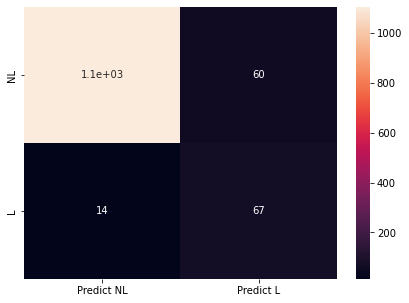

In [59]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["NL","L"]],
                  columns = [i for i in ["Predict NL","Predict L"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### 3.Classfication Matrix:

In [61]:
print('Classification matrix:\n',classification_report(prediction,y_test))

Classification matrix:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1164
         1.0       0.53      0.83      0.64        81

    accuracy                           0.94      1245
   macro avg       0.76      0.89      0.81      1245
weighted avg       0.96      0.94      0.95      1245



This Model has better Precision Rate and also better Recall value

### D. Share improvement achieved from base model to final model

#### Base Model had : parameters such as C=0.1,gamma=1 and kernel of 'rbf'
1. Accuracy on Training Data : 0.90
2. Accuracy on Testing Data : 0.89

#### Final Model had : parameters such as C=0.1,gamma=1 and kernel of 'linear'
1. Accuracy on Training Data : 0.95
2. Accuracy on Testing Data : 0.94

## Thus , Final SVM Model with parameters such as  C=0.1,gamma=1 and kernel of 'Linear' is the best Model